In [1]:
%pip install -r requirements.txt;


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt;'


##  Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


## Load the data

In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.duplicated().sum()

0

## Data Preprocessing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
data.drop("Unnamed: 32", axis=1, inplace = True)
data.drop("id", axis=1, inplace = True)

# vymažeme stĺpec Unnamed, keďže neobsahuje údaje, ID obsahuje nepodstatné informácie pre učenie

## Exploratory Data Analysis (EDA)

In [10]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

# Premeníme M a B na číselné hodnoty

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Histogram

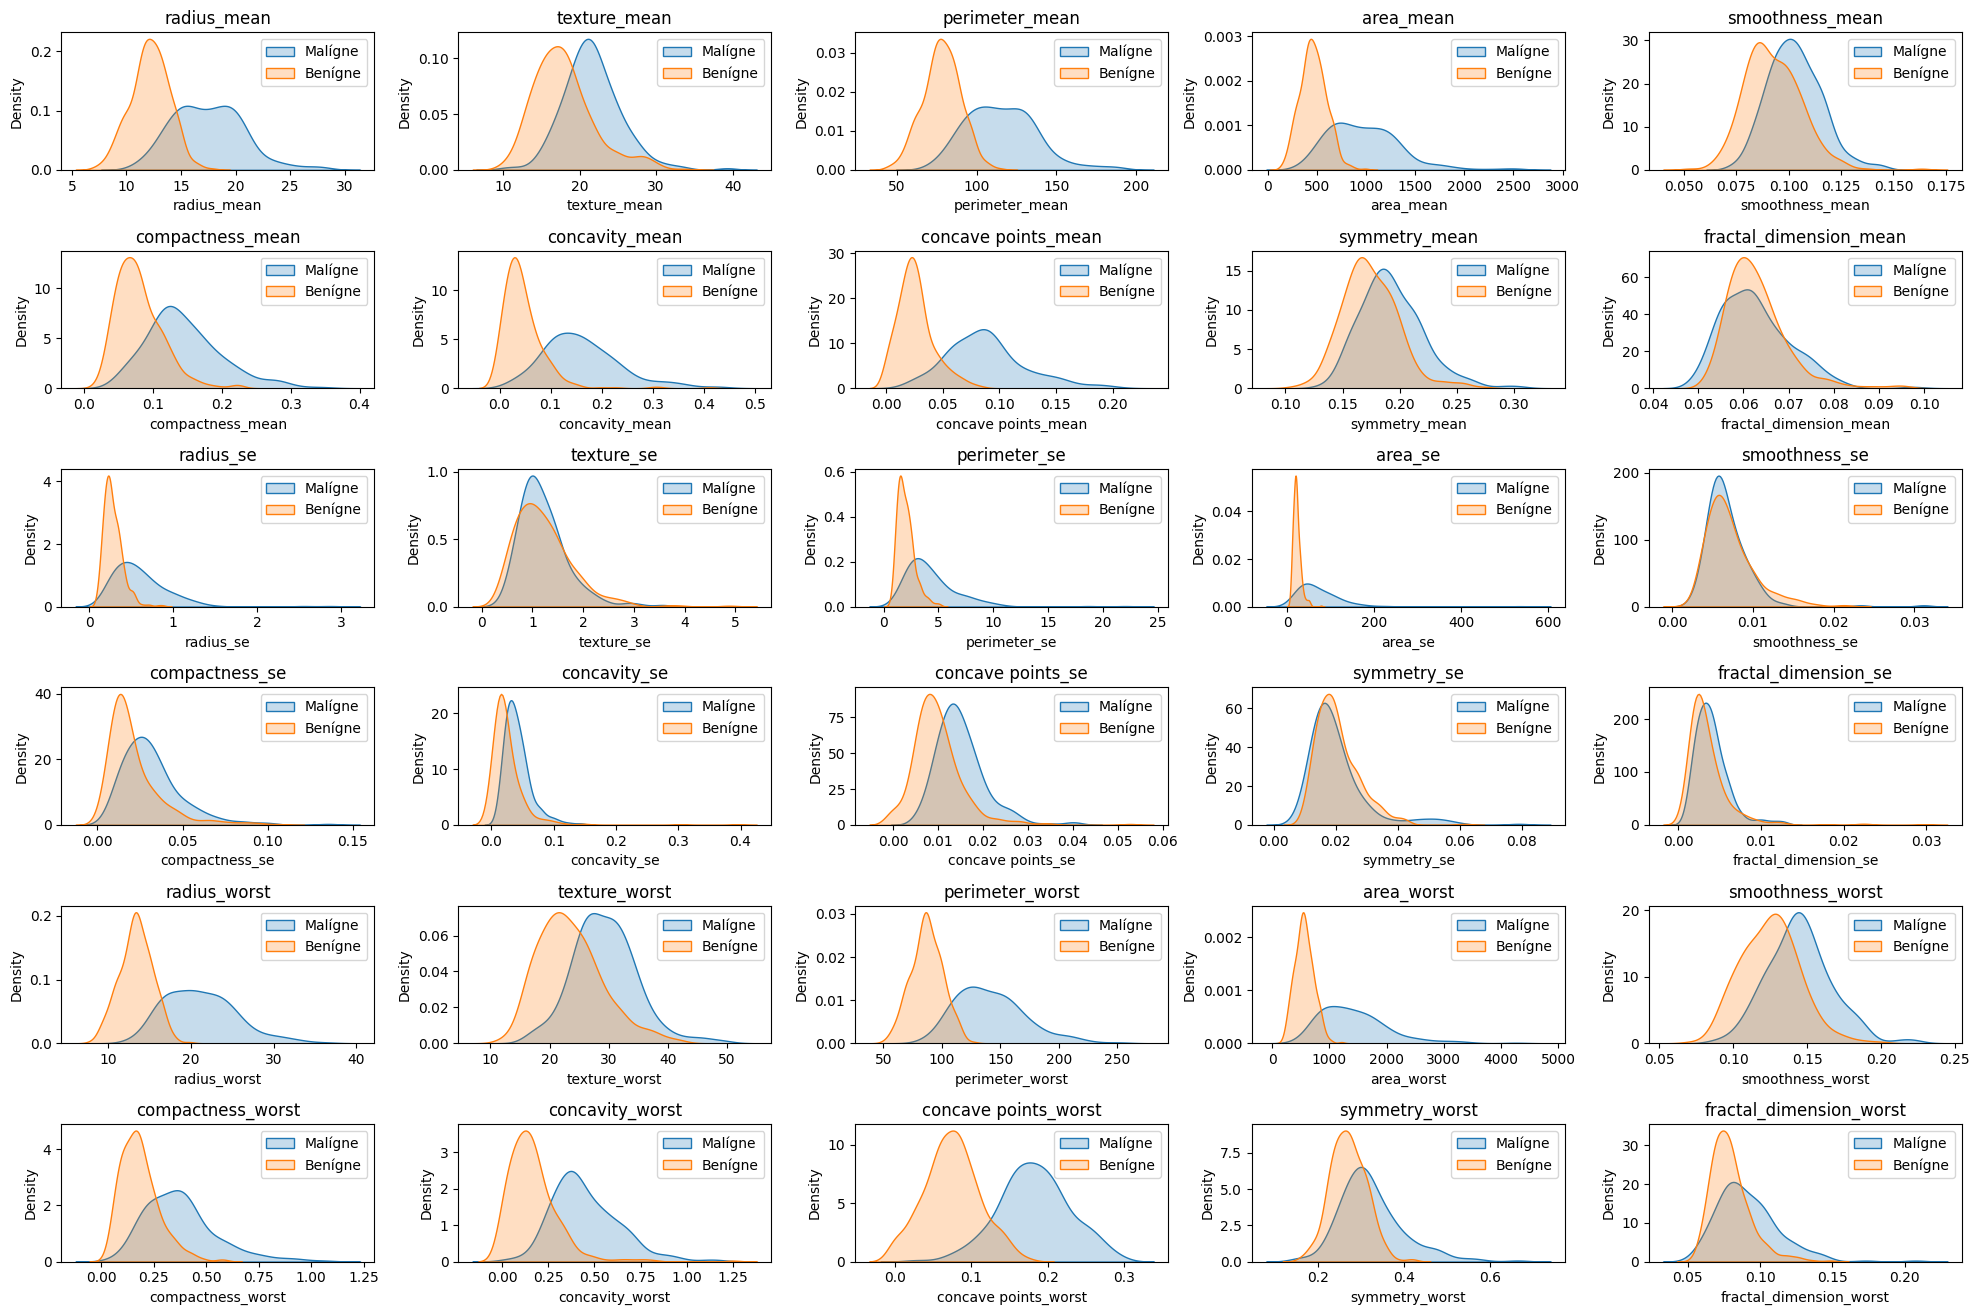

In [11]:
columns_to_plot = data.columns.drop("diagnosis")

plt.figure(figsize=(20, 15))
plotnumber = 1
num_columns = 5  

for column in columns_to_plot:
    plt.subplot(len(columns_to_plot) // num_columns + 1, num_columns, plotnumber)
    sns.kdeplot(data[data['diagnosis'] == 1][column], label='Malígne', fill=True)
    sns.kdeplot(data[data['diagnosis'] == 0][column], label='Benígne', fill=True)
    plt.title(f'{column}')
    plt.legend()
    plotnumber += 1

plt.tight_layout() 
plt.show()


Graf zobrazuje hustotu rozdelenia hodnôt pre malígne nádory (M) - modrá línia a pre benígne nádory (B) - oranžovaná línia

* vo väčšine je zrejmý rozdiel medzi M a B nádormi:
** M sú väčšie (radius_mean, perimeter_mean, area_mean)
** M majú nepravidelné tvary (compactness_mean, concavity_mean, concave points_mean)
** M majú zložitý povrch (vyšší fractal_dimension_mean)

Heatmap

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

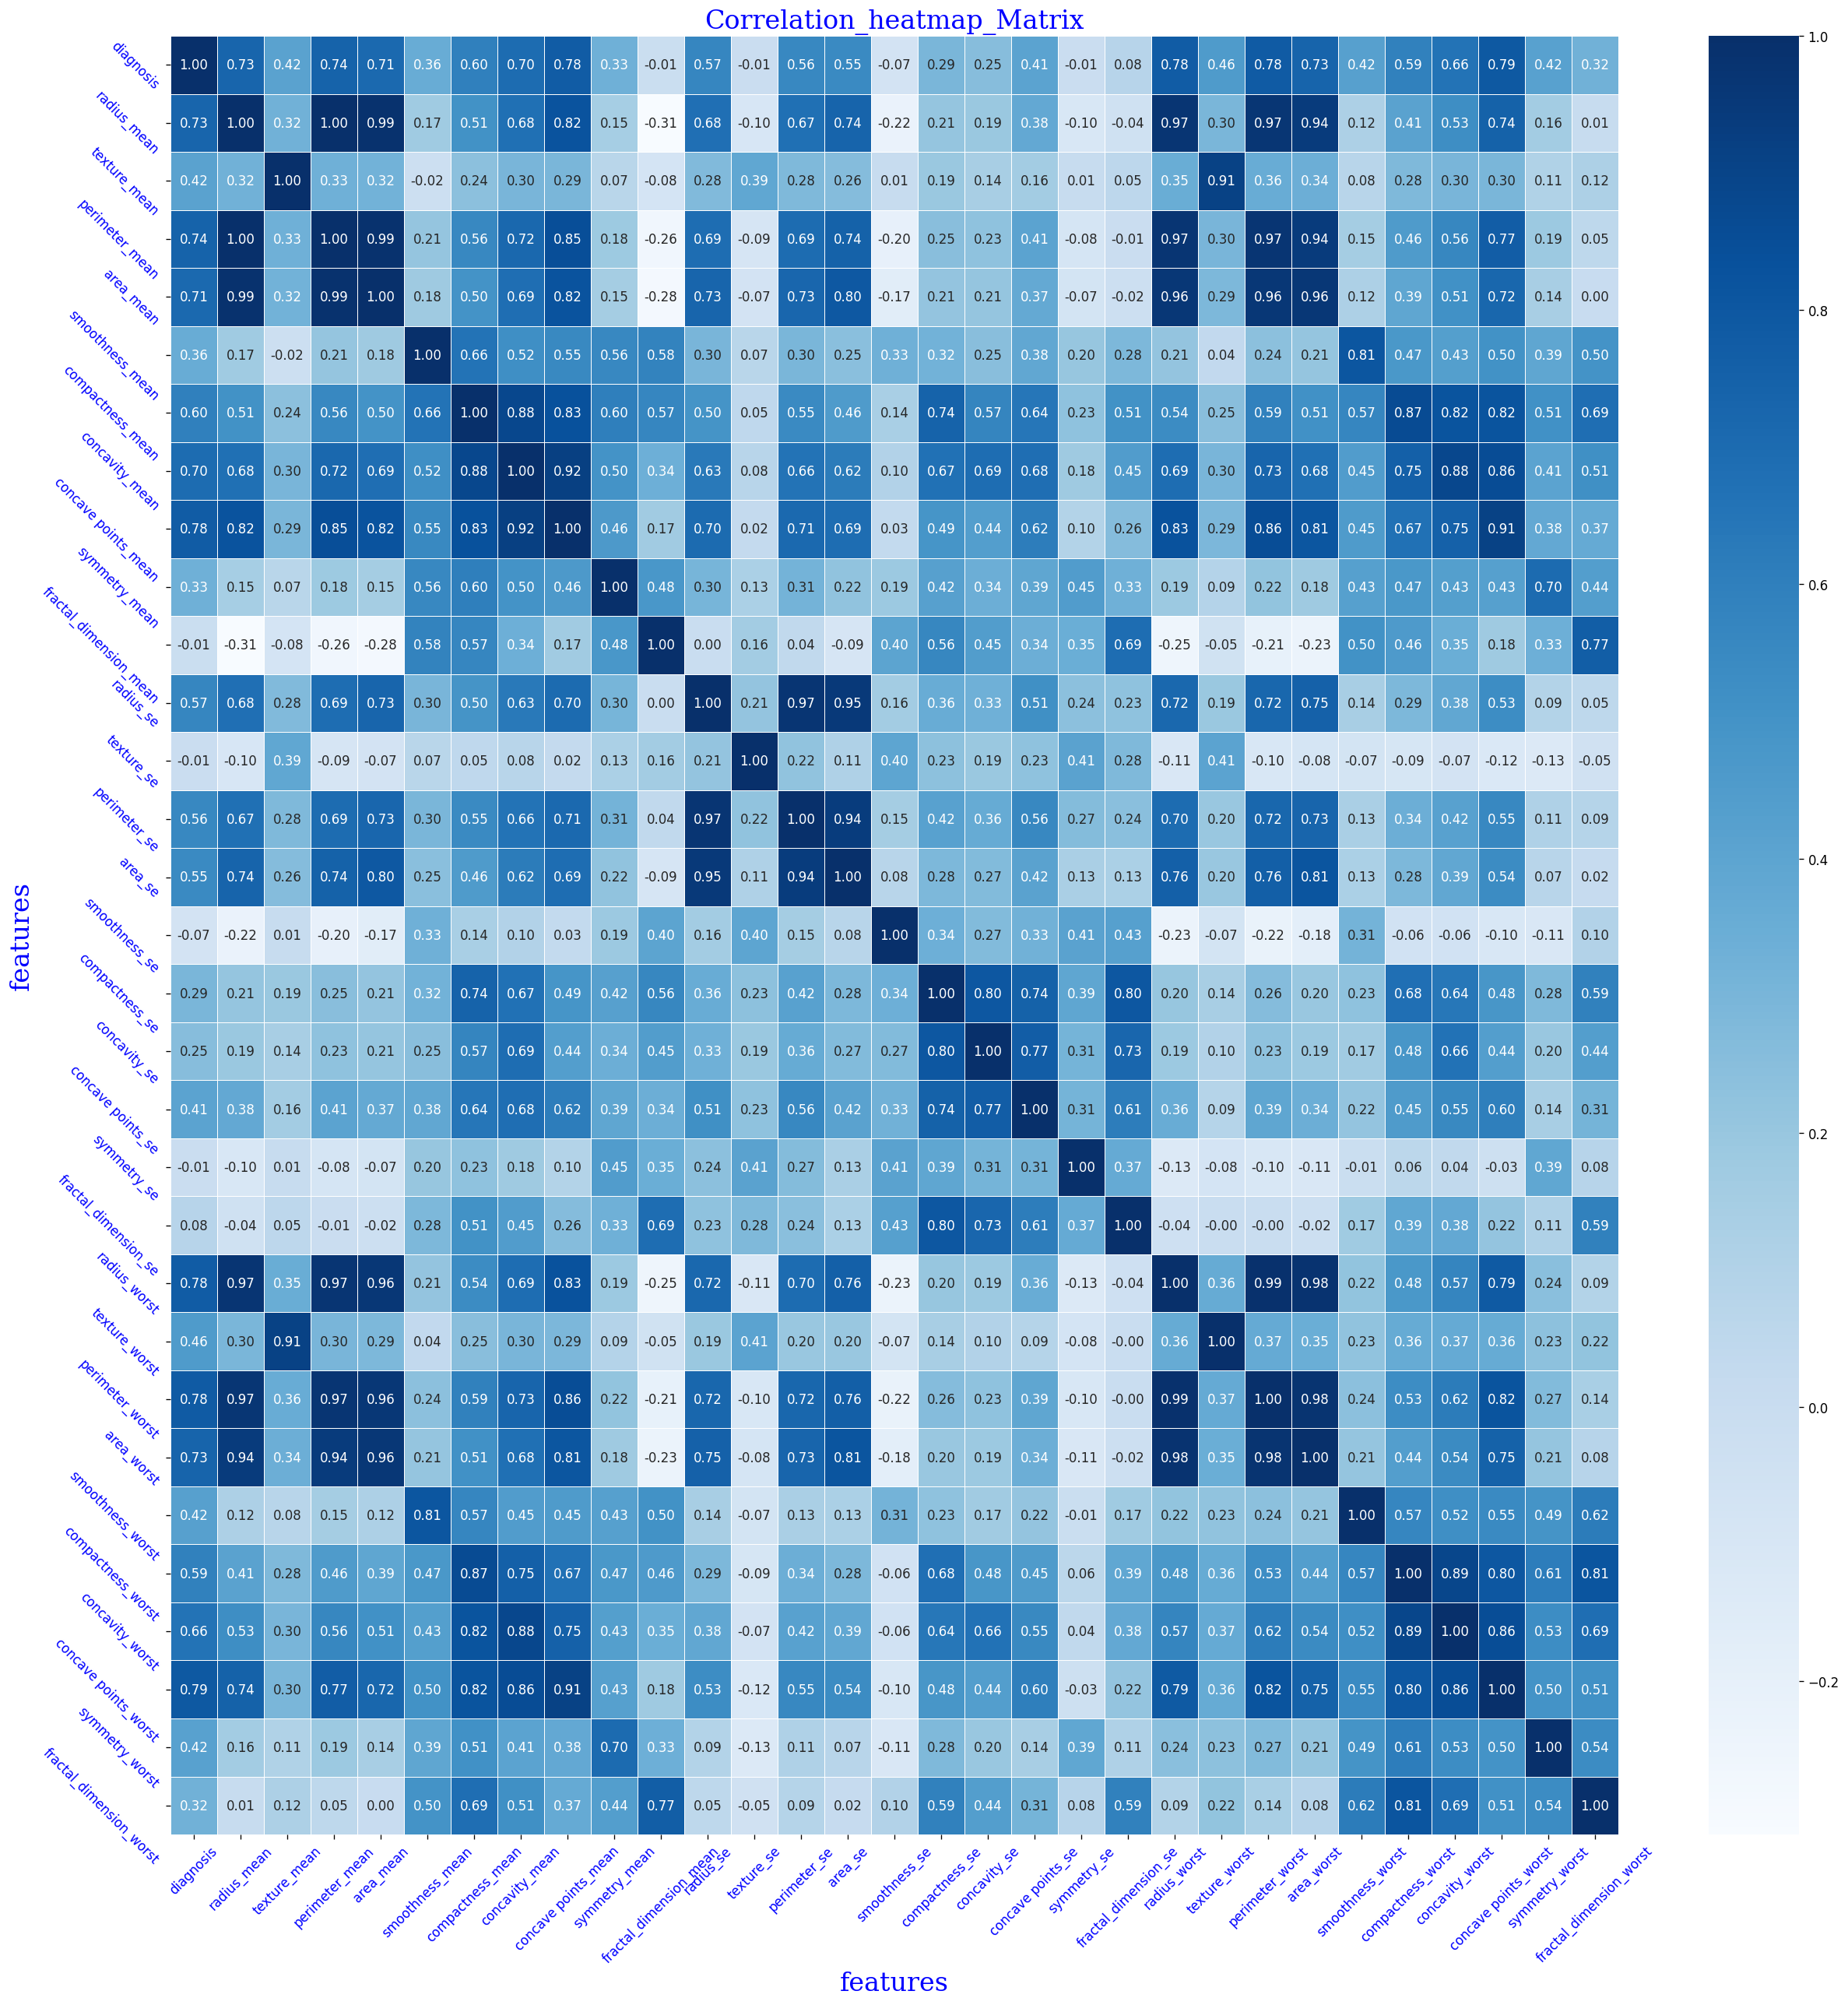

In [12]:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)

* Pomocou Heatmapa korealčnej matice identifikuje vzťahy medzi atribútami.

Silné korelácie: Na heatmape vidíš oblasti, ktoré sú tmavšie, čo indikuje silnú pozitívnu koreláciu (hodnoty blízke 1). Tieto oblasti naznačujú, že niektoré črty sú veľmi podobné alebo majú medzi sebou silnú lineárnu závislosť. Napríklad vidíš vysokú koreláciu medzi "mean radius" a "mean perimeter".

Slabé alebo záporné korelácie: Miesta so svetlými farbami alebo negatívnymi hodnotami naznačujú slabé alebo negatívne korelácie. To znamená, že medzi týmito premennými neexistuje jasná lineárna závislosť, alebo že sa pohybujú opačne.

Korelačná matica môže byť použiteľná pre výber čŕt napr. pre PCA (hlavnú komponentnú analýzu).

## Modelovanie

## Vytvorenie train, test splitu pre redukované dáta a dáta bez redukcie

* Train, test split pre dáta bez redukcie

In [13]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Train-test split pre pôvodné dáta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Škálovanie dát
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 30), (114, 30), (455,), (114,))

* Train, test split pre redukované dáta

Týmto krokom identifikujeme a odstránime vysoko korelačné črty aby sme vyskúšali, či zlepšujú výkonnosť modelov.

In [14]:
# Odstránenie vysoko korelovaných stĺpcov
corr_matrix = data.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

# Redukcia dát
data_reduced = data.drop(to_drop, axis=1)
X_reduced = data_reduced.drop('diagnosis', axis=1)
y_reduced = data_reduced['diagnosis']

# Train-test split pre redukované dáta
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Škálovanie redukovaných dát
scaler = StandardScaler()
X_reduced_train = scaler.fit_transform(X_reduced_train)
X_reduced_test = scaler.transform(X_reduced_test)

X_reduced_train.shape, X_reduced_test.shape, y_reduced_train.shape, y_reduced_test.shape

((455, 22), (114, 22), (455,), (114,))

# Unsupervised Learning

## Dimenzionální redukce a kontrola významu features

PCA (Principal Component Analysis) 
* aplikujeme na neredukované trénovacie dáta aj na redukované trénovacie dáta.
* Redukujeme vysokorozmerné dáta na 2 rozmery

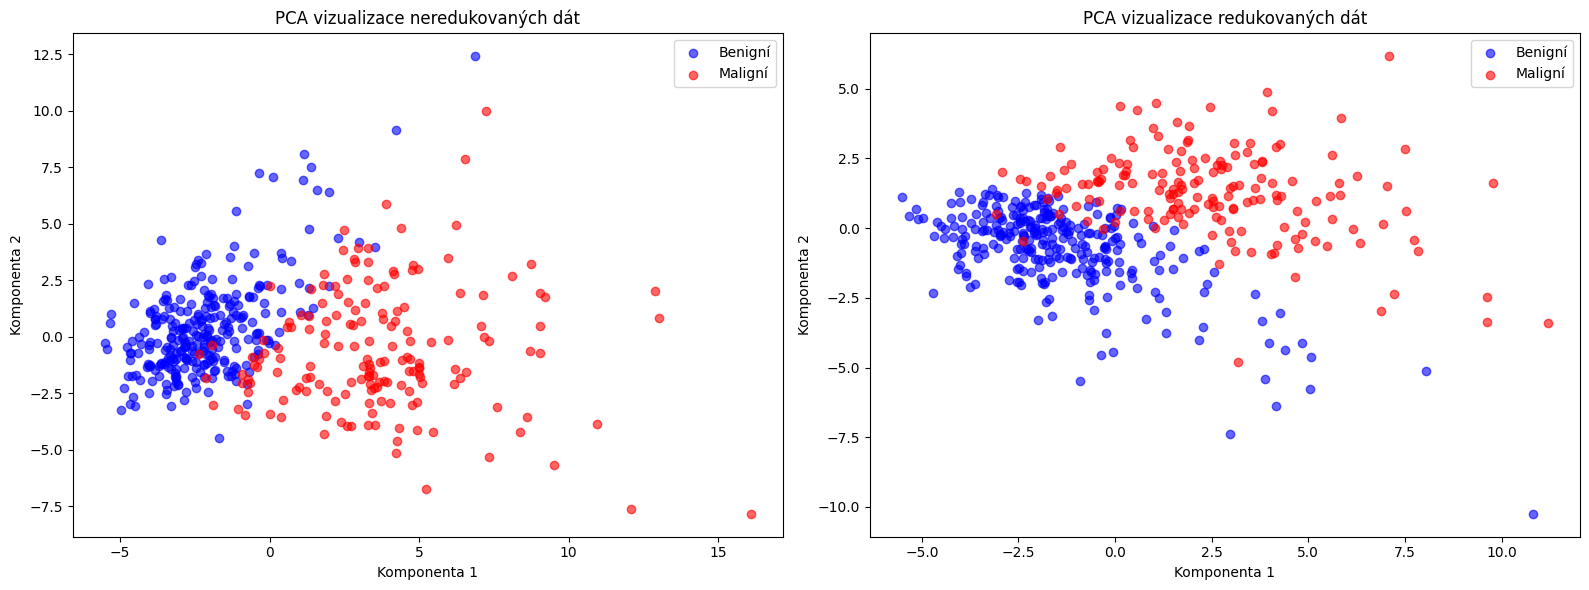

In [15]:
# PCA na neredukované dáta (X_train)
pca_neredukované = PCA(n_components=2)
X_pca_neredukované = pca_neredukované.fit_transform(X_train)

# PCA na redukované dáta (X_reduced_train)
pca_reduced = PCA(n_components=2)
X_pca_reduced = pca_reduced.fit_transform(X_reduced_train)

# Vytvorenie grafu s dvomi podgrafmi vedľa seba
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 rad, 2 stĺpce

# Graf pre neredukované dáta
axes[0].scatter(X_pca_neredukované[y_train == 0, 0], X_pca_neredukované[y_train == 0, 1], label='Benigní', alpha=0.6, c='b')
axes[0].scatter(X_pca_neredukované[y_train == 1, 0], X_pca_neredukované[y_train == 1, 1], label='Maligní', alpha=0.6, c='r')
axes[0].set_title('PCA vizualizace neredukovaných dát')
axes[0].set_xlabel('Komponenta 1')
axes[0].set_ylabel('Komponenta 2')
axes[0].legend()

# Graf pre redukované dáta
axes[1].scatter(X_pca_reduced[y_reduced_train == 0, 0], X_pca_reduced[y_reduced_train == 0, 1], label='Benigní', alpha=0.6, c='b')
axes[1].scatter(X_pca_reduced[y_reduced_train == 1, 0], X_pca_reduced[y_reduced_train == 1, 1], label='Maligní', alpha=0.6, c='r')
axes[1].set_title('PCA vizualizace redukovaných dát')
axes[1].set_xlabel('Komponenta 1')
axes[1].set_ylabel('Komponenta 2')
axes[1].legend()

# Zobrazenie grafov
plt.tight_layout()
plt.show()


* Modré body predstavujú benígne nádory a červené body predstavujú malígne nádory. Body sú premietnuté do roviny vytvorenej dvomi hlavnými komponentmi PCA (komponenta 1 a komponenta 2).

Graf naľavo – neredukované dáta: niektoré modré body sú v časti, kde sa nachádza viac červených bodov, čo naznačuje, že PCA nie je úplne schopné jasne oddeliť obe triedy iba na základe dvoch komponentov.

Graf napravo – redukované dáta: môžme vidieť mierne lepšie oddelenie medzi malígnymi a benígnymi vzorkami.

Význam redukcie dát: Redukcia vysoko korelovaných čŕt môže viesť k lepším výsledkom pri klasifikácii. Ako ukazuje graf, PCA na redukovaných dátach poskytuje o niečo lepšiu separáciu medzi triedami.

Nedostatok úplnej separácie: V oboch grafoch stále existuje určitý stupeň prekrývania medzi benígnymi a malígnymi vzorkami, čo naznačuje, že pre plnú klasifikáciu bude potrebné použiť ďalšie metódy, ako napríklad pokročilé klasifikačné modely.

Pokračujeme porovnaním kumulatívnej variácie pre neredukované a redukované dáta

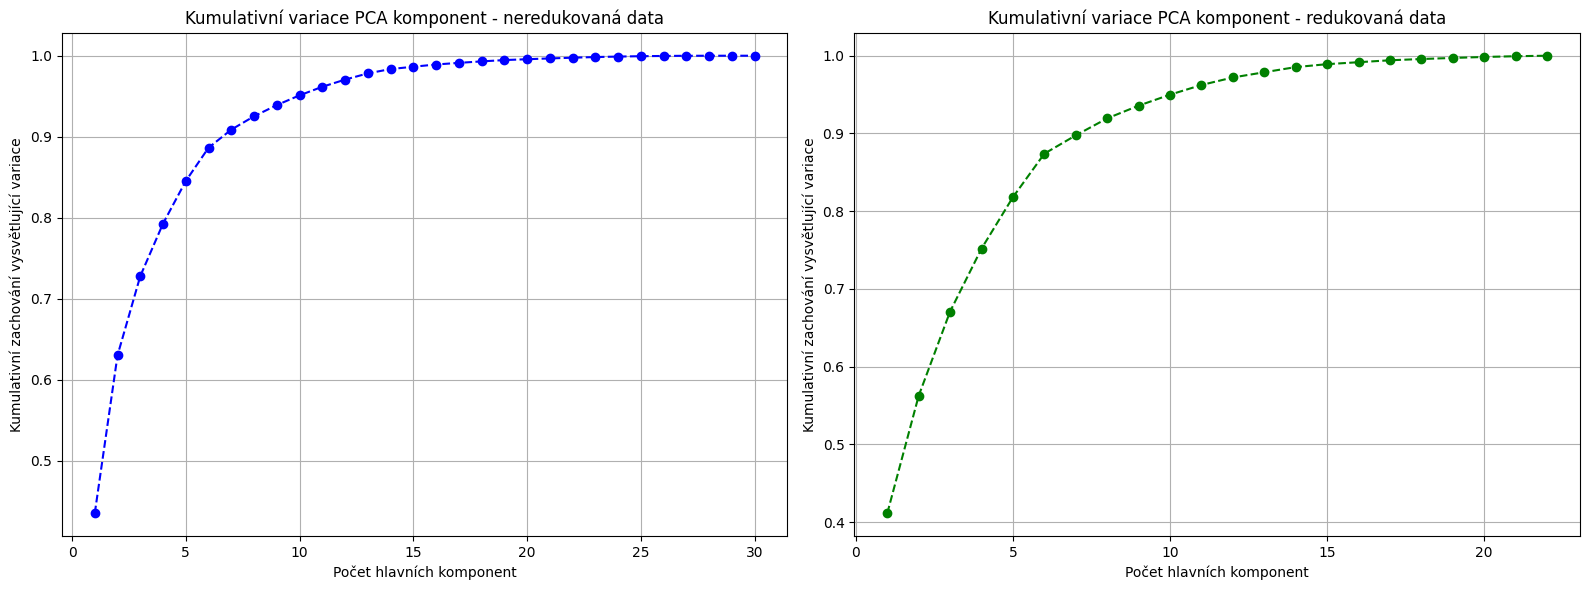

In [16]:
# PCA na neredukované dáta (X_train)
pca_neredukované = PCA().fit(X_train)
explained_variance_ratio_neredukované = pca_neredukované.explained_variance_ratio_.cumsum()

# PCA na redukované dáta (X_reduced_train)
pca_reduced = PCA().fit(X_reduced_train)
explained_variance_ratio_reduced = pca_reduced.explained_variance_ratio_.cumsum()

# Vytvorenie grafu s dvomi podgrafmi vedľa seba
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 rad, 2 stĺpce

# Graf pre neredukované dáta
axes[0].plot(range(1, len(explained_variance_ratio_neredukované) + 1), explained_variance_ratio_neredukované, 
             marker='o', linestyle='--', color='b')
axes[0].set_title('Kumulativní variace PCA komponent - neredukovaná data')
axes[0].set_xlabel('Počet hlavních komponent')
axes[0].set_ylabel('Kumulativní zachování vysvětlující variace')
axes[0].grid(True)

# Graf pre redukované dáta
axes[1].plot(range(1, len(explained_variance_ratio_reduced) + 1), explained_variance_ratio_reduced, 
             marker='o', linestyle='--', color='g')
axes[1].set_title('Kumulativní variace PCA komponent - redukovaná data')
axes[1].set_xlabel('Počet hlavních komponent')
axes[1].set_ylabel('Kumulativní zachování vysvětlující variace')
axes[1].grid(True)

# Zobrazenie grafov
plt.tight_layout()
plt.show()


Grafy zobrazujú kumulatívnu vysvetľujúcu varianciu PCA (hlavnej komponentnej analýzy) pre neredukované a redukované dáta. Tieto grafy umožňujú zistiť, koľko hlavných komponentov potrebujeme na zachytenie určitého percenta variability v dátach.

Neredukované dáta (ľavý graf): Na zachytenie približne 90 % variability je potrebných okolo 15 hlavných komponentov.
Graf ukazuje, že s pridaním ďalších komponentov sa zlepšuje zachytenie variability, ale od určitého bodu (okolo 20 komponentov) prírastok variancie sa stáva minimálnym. To znamená, že pridanie ďalších komponentov už neprináša veľký prínos v zachytávaní ďalšej variancie.

Redukované dáta (pravý graf): Pre redukované dáta je potrebných menej hlavných komponentov na dosiahnutie podobnej vysvetľujúcej variancie.
Približne 90 % variability sa dosiahne už s približne 10 hlavnými komponentmi, čo je výrazné zlepšenie v porovnaní s neredukovanými dátami.

Zmeny môžu zefektívniť ďalšie modelovanie.

In [17]:
# PCA pre neredukované dáta (X_train)
pca_neredukované = PCA().fit(X_train)
cumulative_variance_neredukované = np.cumsum(pca_neredukované.explained_variance_ratio_)

# Počet komponent, ktoré zachovajú aspoň 99,5 % variácie pre neredukované dáta
num_components_neredukované = np.argmax(cumulative_variance_neredukované >= 0.995) + 1
print(f"Počet komponent, které vysvětlí alespoň 99,5 % variance (neredukovaná data): {num_components_neredukované}")

# PCA pre redukované dáta (X_reduced_train)
pca_reduced = PCA().fit(X_reduced_train)
cumulative_variance_reduced = np.cumsum(pca_reduced.explained_variance_ratio_)

# Počet komponent, ktoré zachovajú aspoň 99,5 % variácie pre redukované dáta
num_components_reduced = np.argmax(cumulative_variance_reduced >= 0.995) + 1
print(f"Počet komponent, které vysvětlí alespoň 99,5 % variance (redukovaná data): {num_components_reduced}")


Počet komponent, které vysvětlí alespoň 99,5 % variance (neredukovaná data): 20
Počet komponent, které vysvětlí alespoň 99,5 % variance (redukovaná data): 18


Pre neredukované dáta potrebujeme 20 komponentov na vysvetlenie aspoň 99,5 % variance. Neredukované dáta obsahujú viac čŕt, ktoré sa do istej miery navzájom prekrývajú alebo duplikujú informácie, čo vedie k tomu, že potrebuješ viac hlavných komponentov na zachytenie plnej variability.

Pre redukované dáta potrebuješ už len 18 komponentov na vysvetlenie aspoň 99,5 % variance. Toto zlepšenie poukazuje na to, že odstránenie vysoko korelovaných čŕt zjednodušilo štruktúru dát, pričom si zachovala rovnakú úroveň vysvetľujúcej sily s menším počtom hlavných komponentov.  To nielen zjednodušuje ďalšie modelovanie, ale tiež môže zlepšiť výpočtovú efektivitu a znížiť riziko overfittingu pri neskoršom tréningu modelov.

In [18]:
# PCA pre neredukované dáta (X_train) - zachovanie 99,5 % variance
pca_neredukované = PCA(n_components=0.995)
X_pca_neredukované = pca_neredukované.fit_transform(X_train)

# PCA pre redukované dáta (X_reduced_train) - zachovanie 99,5 % variance
pca_reduced = PCA(n_components=0.995)
X_pca_reduced = pca_reduced.fit_transform(X_reduced_train)

# Výsledky pre neredukované dáta
print(f"Počet komponent, které zachovávají 99,5 % variance (neredukovaná data): {pca_neredukované.n_components_}")
print(f"Tvar původního datasetu (neredukovaná data): {X_train.shape}")
print(f"Tvar datasetu po aplikaci PCA (neredukovaná data): {X_pca_neredukované.shape}")

# Výsledky pre redukované dáta
print(f"Počet komponent, které zachovávají 99,5 % variance (redukovaná data): {pca_reduced.n_components_}")
print(f"Tvar původního datasetu (redukovaná data): {X_reduced_train.shape}")
print(f"Tvar datasetu po aplikaci PCA (redukovaná data): {X_pca_reduced.shape}")


Počet komponent, které zachovávají 99,5 % variance (neredukovaná data): 20
Tvar původního datasetu (neredukovaná data): (455, 30)
Tvar datasetu po aplikaci PCA (neredukovaná data): (455, 20)
Počet komponent, které zachovávají 99,5 % variance (redukovaná data): 18
Tvar původního datasetu (redukovaná data): (455, 22)
Tvar datasetu po aplikaci PCA (redukovaná data): (455, 18)


Aplikácia PCA pomohla znížiť dimenzionalitu dát bez výraznej straty vysvetľujúcej variance:

Neredukované dáta:
Pôvodný tvar datasetu: (455, 30) – dataset obsahoval 30 čŕt.
Počet komponentov po PCA: 20 – na zachovanie aspoň 99,5 % variance potrebujete 20 hlavných komponentov.
Tvar datasetu po PCA: (455, 20) – PCA zredukovalo počet čŕt z 30 na 20, čím sa odstránili redundantné informácie, ale zachovala sa podstatná časť variability dát.

Redukované dáta:
Pôvodný tvar datasetu: (455, 22) – po odstránení vysoko korelovaných čŕt zostalo 22 čŕt.
Počet komponentov po PCA: 18 – na zachovanie 99,5 % variance stačí 18 hlavných komponentov.
Tvar datasetu po PCA: (455, 18) – redukované dáta vyžadovali menej hlavných komponentov, čo poukazuje na to, že odstránenie vysoko korelovaných čŕt viedlo k jednoduchšej štruktúre dát.

## Supervised Learning

## Logistická regresia

Začnu běžnou logistickou regresí, protože je to vhodná metoda, která využívá dichotomie závislé proměnné - u nás tedy rozdělení na Maligní a Benigní nádor. Tímto pouze natrénuji model abych viděl, zda je podobnost

In [19]:
# Logistická regrese model
model = LogisticRegression(max_iter=10000)

#Trénování modelu
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
# Predikce
y_pred = model.predict(X_test)

# Jaká je přesnost modelu
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(accuracy)
print(classification_report_str)

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Model správne predpovedal 97 % prípadov.

Trieda 0 (benígne): 0.97 – 97 % vzoriek klasifikovaných ako benígne sú skutočne benígne.

Trieda 1 (malígne): 0.98 – 98 % vzoriek klasifikovaných ako malígne sú skutočne malígne.

Trieda 0 (benígne): 0.99 – 99 % skutočne benígnych prípadov bolo správne identifikovaných.

Trieda 1 (malígne): 0.95 – 95 % skutočne malígnych prípadov bolo správne zachytených modelom.

In [21]:
# TRÉNOVÁNÍ MODELU S REDUKOVANÝMI DATY

# Logistická regrese model
model_reduced = LogisticRegression(max_iter=50000)

#Trénování modelu
model_reduced.fit(X_reduced_train, y_reduced_train)

LogisticRegression(max_iter=50000)

In [22]:
# Predikce standardního modelu
y_reduced_pred = model_reduced.predict(X_reduced_test)

# Jaká je přesnost modelu
accuracy_reduced = accuracy_score(y_reduced_test, y_reduced_pred)
classification_report_str_reduced = classification_report(y_reduced_test, y_reduced_pred)

print(accuracy_reduced)
print(classification_report_str_reduced)

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Model logistickej regresie dosiahol veľmi podobné výsledky aj na redukovaných dátach po odstránení vysoko korelovaných čŕt.

Presnosť (Accuracy): 0.9737 (97.37%) – Model má opäť vysokú presnosť, ktorá sa zhoduje s výsledkami z neredukovaných dát.

Precision (Presnosť) a Recall (Citlivosť) pre triedy 0 (benígne) a 1 (malígne) sú rovnaké ako v neredukovaných dátach, čo naznačuje, že zníženie dimenzionality neovplyvnilo presnosť modelu.


In [23]:
def compare_accuracy(accuracy, accuracy_reduced):
    if accuracy > accuracy_reduced:
        print("MODEL bez REDUKCE DAT vychází lépe.")
    elif accuracy < accuracy_reduced:
        print("Model S REDUKCÍ dat vychází lépe.")
    else:
        print("Vstupní data nevykazují žádný vliv na výsledek LOGISTICKÉ REGRESE")

compare_accuracy(accuracy, accuracy_reduced)

Vstupní data nevykazují žádný vliv na výsledek LOGISTICKÉ REGRESE


In [24]:
# Výsledky modelov
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

logistic_results = {
    'Model': ['Logistic Regression'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

# Decision Tree


- Test s Decision Tree

Presnosť modelu rozhodovacieho stromu: 0.9474


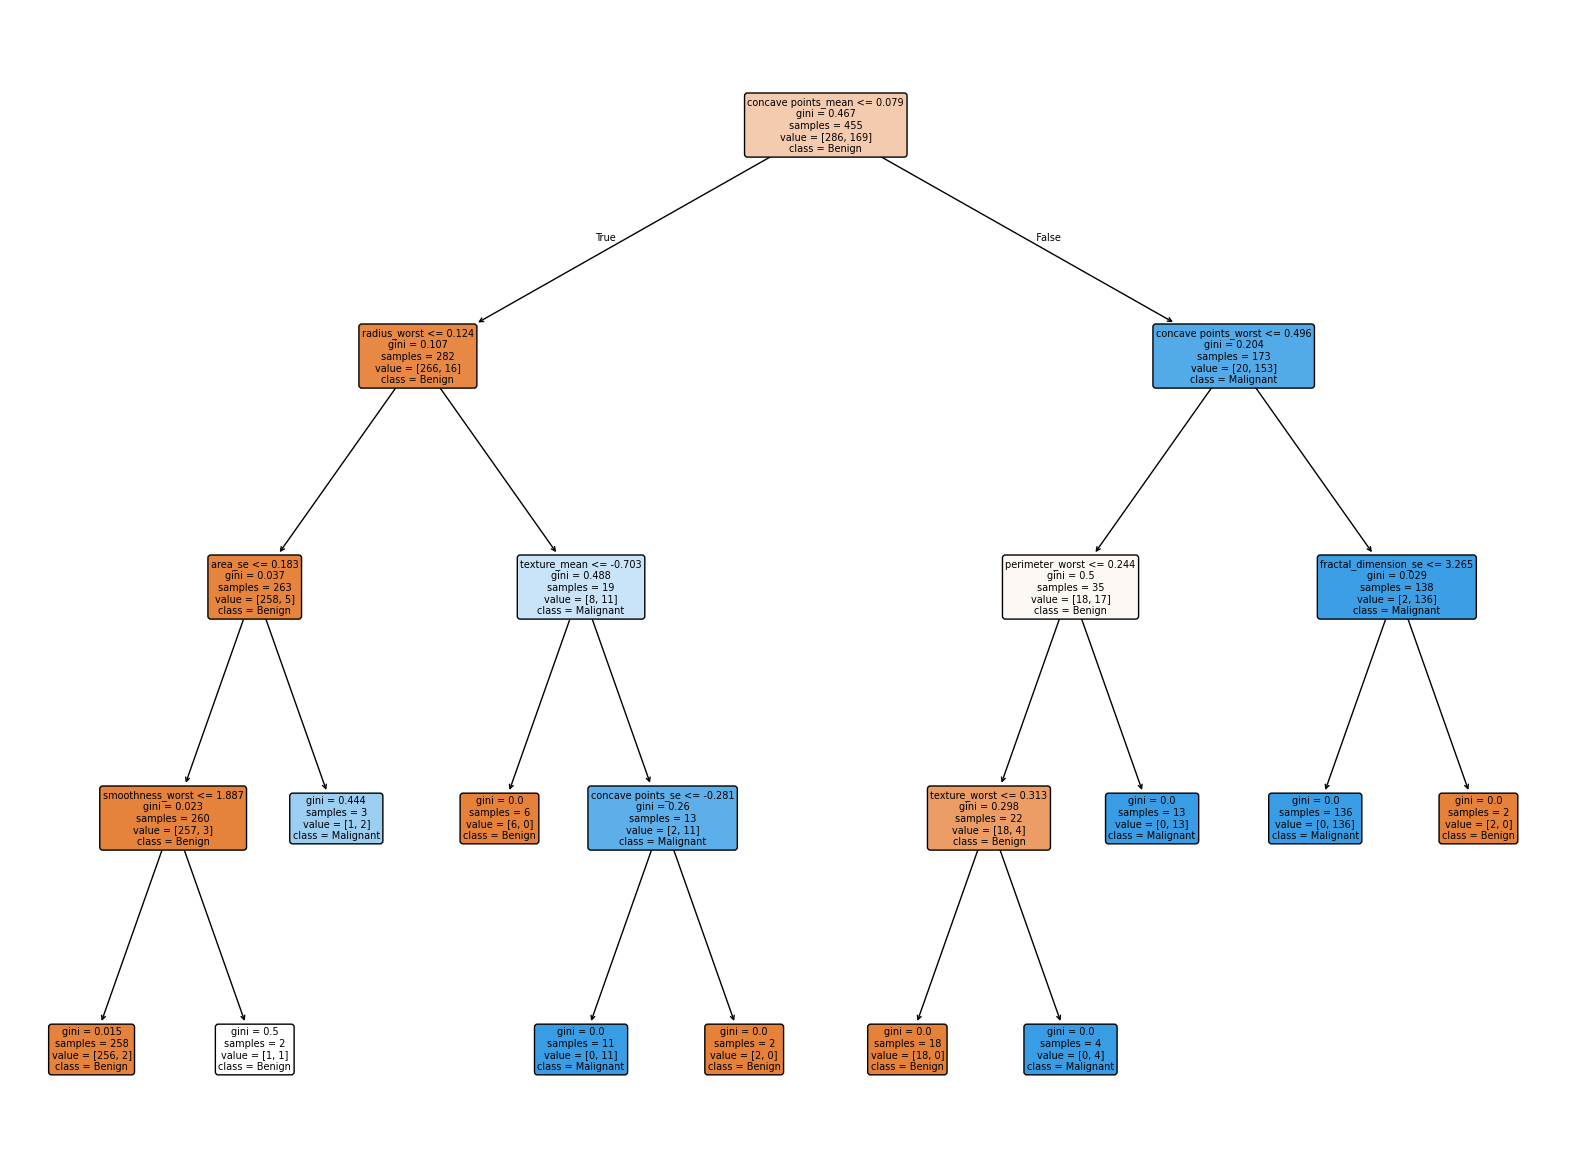

In [25]:
decision_tree = DecisionTreeClassifier(random_state=42,
                                       max_depth=4,  
                                       min_samples_split=2,  
                                       min_samples_leaf=2)  
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Presnosť modelu rozhodovacieho stromu: {accuracy:.4f}')

plt.figure(figsize=(20, 15))
tree.plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.show()


Vytvorený rozhodovací strom vizualizuje rozhodovací proces modelu na základe najdôležitejších čŕt, ktoré rozdeľujú vzorky na benígne a malígne.

Prvá rozhodovacia črta, ktorú model použil, je concave points_mean (stredná hodnota konkávnych bodov)
Ďalšie dôležité črty zahŕňajú radius_worst, perimeter_worst, a texture_mean, ktoré zohrávajú významnú úlohu v ďalšom rozdelení uzlov.

Jednoduchosť a prehľadnosť:
Strom má hĺbku 5, čo poskytuje jasné a zrozumiteľné rozhodovacie cesty bez zbytočných komplikácií. 

Vyváženosť medzi triedami: Model dokáže vyvážene klasifikovať vzorky pre obe triedy (benígne aj malígne).

In [26]:
# Výsledky modelov
y_train_pred = decision_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

decision_tree_results = {
    'Model': ['Decision Tree'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

# Support Vector Machines (SVM)
Detekcia anomálii SVM

* SVM  hľadá najlepšiu hranicu na oddelenie dvoch tried (napríklad benígne vs. malígne nádory).

* SVM je účinná metóda pre binárnu klasifikáciu, ktorá je odolná voči pretrénovaniu a dokáže prispôsobiť hranicu medzi triedami podľa potreby pomocou rôznych jadier (lineárnych alebo nelineárnych).

In [27]:
# Iniciace SVM model (defaultni nastavení)
svm_model = SVC(kernel='linear', random_state=42)

# Trénink SVM modelu
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# Defaultní nastavení SVM modelu - jaké mám aktuální nastavení
SVC.get_params(svm_model)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Pri tomto nastavení modelu SVC používa lineárne jadro a penalizáciu C = 1.0, čo znamená, že model bude vyhľadávať jednoduchú lineárnu separáciu medzi triedami s miernou penalizáciou za chyby. Používa prednastavené nastavenie pre hodnoty gamma, rozhodovaciu funkciu pre viac tried a trénovanie s maximalizáciou iterácií bez obmedzenia.

In [29]:
# Predikce na testovacích datech
y_pred_svm = svm_model.predict(X_test)

# Přesnost modelu a report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
# Výsledek
print(f"Přesnost: {accuracy_svm}")
print(f"Classification Report:\n{classification_report_svm}")

Přesnost: 0.956140350877193
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Model správne predpovedal 95,61 % prípadov, čo ukazuje vysokú presnosť klasifikácie. 

Precision (Presnosť):
Trieda 0 (benígne): 0.97 – 97 % vzoriek klasifikovaných ako benígne boli skutočne benígne.
Trieda 1 (malígne): 0.93 – 93 % vzoriek klasifikovaných ako malígne boli skutočne malígne.
Vyššia presnosť pre benígne prípady znamená, že model je veľmi dobrý v identifikácii neškodných prípadov, zatiaľ čo pre malígne prípady je mierne nižšia, čo môže viesť k niektorým falošne pozitívnym predikciám.

Recall (Citlivosť):
Trieda 0 (benígne): 0.96 – 96 % skutočne benígnych prípadov bolo správne klasifikovaných.
Trieda 1 (malígne): 0.95 – 95 % skutočne malígnych prípadov bolo správne klasifikovaných.
Vysoká citlivosť pre malígne prípady je kritická, pretože zabezpečuje, že model správne identifikuje väčšinu malígnych nádorov, čo je dôležité v medicínskych aplikáciách.

Běžné nastavení SVM vychází s přesností 95,6 % - proto pokračujeme s nalezením lepších parametrů

In [30]:
# Výsledky modelov
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

svm_results = {
    'Model': ['SVM'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

## OPTIMALIZACE HYPERPARAMETRŮ POMOCÍ GridSearch - SVM
- použiji Gridsearch pro hyperparametr tuning
- hledáme nejlepší nastavení s cyklem několika proměnných
- Pro naše účely se zaměříme zejména na parametry C, kernal a gamma

In [31]:
# Standardizování featur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rozdělení dat - budu experimentovat s různými hodnotami
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Nastavuji parametry SVM - různé hodnoty
param_grid = {
    'C': [0.1, 0.5, 0.8, 1, 10, 50, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.05, 0.1, 0.3, 0,5, 1]
}

In [32]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=10, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.8, 1, 10, 50, 100],
                         'gamma': ['scale', 'auto', 0.05, 0.1, 0.3, 0, 5, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [33]:
# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best hyperparameters:", best_params)

# Make predictions on the test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [34]:
# Evaluate the model's accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Model správne predpovedal 98,25 % prípadov, čo je mimoriadne vysoká presnosť.

Precision (Presnosť):

Trieda 0 (benígne): 0.97 – 97 % vzoriek klasifikovaných ako benígne boli skutočne benígne.
Trieda 1 (malígne): 1.00 – 100 % vzoriek klasifikovaných ako malígne boli skutočne malígne.
Absolútna presnosť pre triedu malígnych vzoriek znamená, že model správne rozpoznáva všetky malígne prípady bez falošne pozitívnych predikcií.

Recall (Citlivosť):

Trieda 0 (benígne): 1.00 – 100 % skutočne benígnych prípadov bolo správne klasifikovaných, čo znamená, že model zachytil všetky benígne prípady.
Trieda 1 (malígne): 0.95 – 95 % skutočne malígnych prípadov bolo správne klasifikovaných. Hoci toto číslo nie je dokonalé, stále je veľmi vysoké.

In [35]:
print(f"Kompletní nastavení modelu: {SVC.get_params(grid_search.best_estimator_)}")

Kompletní nastavení modelu: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Kontrola overfittingu

In [36]:
# Výsledky na tréninkových datech
train_accuracy = grid_search.score(X_train, y_train)
print(f"Train accuracy: {train_accuracy}")

# Výsledky na testovacích datech
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Zkontroluj rozdíl mezi train a test
if train_accuracy - test_accuracy > 0.05:
    print("Model pravděpodobně overfituje!")

Train accuracy: 0.9824175824175824
Test accuracy: 0.9824561403508771


Keďže presnosť na tréningovej množine a testovacej množine je veľmi podobná, môžeme usúdiť, že model nie je overfittovaný (nepretrénovaný).

Křížová validace

In [37]:
from sklearn.model_selection import cross_val_score

# Použití křížové validace na konečném modelu
cross_val_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print(f"Křížově validované skóre: {cross_val_scores}")
print(f"Průměrné křížově validované skóre: {cross_val_scores.mean()}")

Křížově validované skóre: [0.93859649 0.94736842 0.98245614 0.92105263 0.95575221]
Průměrné křížově validované skóre: 0.9490451793199813


Stabilný výkon: Rozdiely medzi jednotlivými skóre sú pomerne malé, čo naznačuje, že model je stabilný a funguje konzistentne naprieč rôznymi časťami dát.

Žiadny overfitting: Priemerné skóre krížovej validácie je veľmi blízke výsledkom na testovacích dátach, čo znamená, že model dobre generalizuje a nie je pretrénovaný na konkrétnu tréningovú množinu.

Výborná generalizácia: S priemernou presnosťou 94.90 % môžeme model považovať za veľmi spoľahlivý aj pri predikciách na nových dátach.

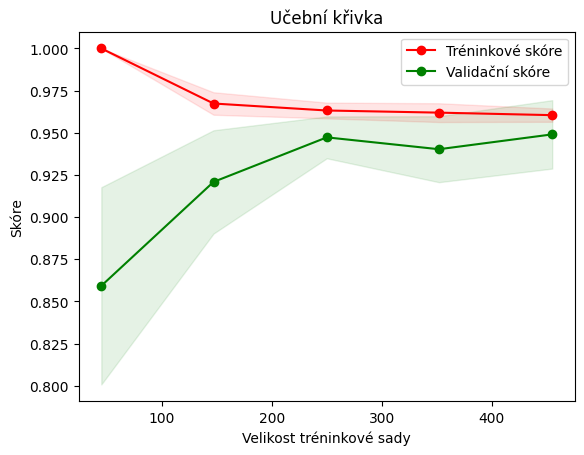

In [38]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Vytvoření učební křivky
train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Výpočet průměrného skóre a jeho rozptylu
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot učební křivky
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Tréninkové skóre")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validační skóre")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title('Učební křivka')
plt.xlabel('Velikost tréninkové sady')
plt.ylabel('Skóre')
plt.legend(loc="best")
plt.show()

Model dosahuje veľmi dobrý výkon na väčších množstvách dát a nie je pretrénovaný.

Graf ukazuje, že model profituje z väčšieho množstva tréningových dát a jeho validačné skóre sa zlepšuje, keď má viac informácií na učenie.

Tento výsledok je pozitívnym indikátorom, že model je schopný generalizovať a bude spoľahlivý aj na nových dátach.

# RANDOM FOREST

- Test s Random Forest

In [39]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
print("Train accuracy score", accuracy_score(y_train, rfc.predict(X_train)))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))
print("Test accuracy score",rfc_acc)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 1.0
Test accuracy score 0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Train accuracy: 1.0 (100%)
Perfektné skóre na tréningových dátach znamená, že model zvládol všetky tréningové vzorky bez chýb. To môže byť indikátorom overfittingu (pretrénovania), pretože model sa možno až príliš prispôsobil tréningovým dátam a môže mať problém s generalizáciou na nových dátach.

Test accuracy: 0.9649 (96.49%)
Presnosť na testovacích dátach je veľmi vysoká, ale nižšia ako na tréningových dátach, čo je normálne. Model si na neznámych dátach počína veľmi dobre, čo naznačuje, že overfitting nie je závažný, no treba ho s


Precision (Presnosť):
Trieda 0 (benígne): 0.96 – 96 % klasifikácií ako benígne bolo skutočne benígne.
Trieda 1 (malígne): 0.98 – 98 % klasifikácií ako malígne bolo skutočne malígne. Vysoká presnosť pre triedu 1 je pozitívna, pretože minimalizuje falošné pozitíva pre malígne prípady.

Recall (Citlivosť):
Trieda 0 (benígne): 0.99 – 99 % skutočne benígnych prípadov bolo správne identifikovaných.
Trieda 1 (malígne): 0.93 – 93 % skutočne malígnych prípadov bolo správne identifikovaných, čo znamená, že model nezachytil 7 % skutočne malígnych nádorov, čo môže byť kritické.

In [41]:
#Uloženie modelu
y_train_pred = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

random_forest_results = {
    'Model': ['Random Forest'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

# ADABOOST with fine tuning

- Test s modelom Adaboost aj s fine tuningom cez GridSearch

In [42]:
parameters = {'n_estimators': [10, 30, 50, 75, 100, 200], 'learning_rate': [0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 3], 'algorithm': ['SAMME']}

ada_ft = AdaBoostClassifier(random_state=42)

gs = GridSearchCV(ada_ft, parameters, cv=5, scoring='f1_weighted', verbose=0)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 3],
                         'n_estimators': [10, 30, 50, 75, 100, 200]},
             scoring='f1_weighted')

In [43]:
gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}

Model je nastavený na použitie SAMME algoritmu, ktorý je vhodný pre multi-class klasifikáciu, a bude trénovať 50 slabých klasifikátorov s plným learning_rate 1. Toto nastavenie by malo zabezpečiť dobrý výkon pre väčšinu úloh klasifikácie, ale v prípade potreby môžeš experimentovať s nižšou rýchlosťou učenia alebo vyšším počtom odhadcov, ak chceš zlepšiť presnosť alebo stabilitu modelu.

In [44]:
print("Train accuracy score", accuracy_score(y_train, gs.predict(X_train)))
gs_acc = accuracy_score(y_test, gs.predict(X_test))
print("Test accuracy score",gs_acc)
y_pred = gs.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 1.0
Test accuracy score 0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Train accuracy: 1.0 (100%)
Perfektná presnosť na tréningových dátach, čo môže naznačovať overfitting. Model sa dokonale prispôsobil tréningovým dátam, čo nemusí byť ideálne, pretože môže mať problém s generalizáciou na nových dátach.

Test accuracy: 0.9649 (96.49%)
Napriek perfektnému tréningovému skóre je presnosť na testovacích dátach stále veľmi vysoká (96.49 %). To naznačuje, že aj keď model vykazuje určitý overfitting, stále si vedie dobre na testovacích dátach.

Precision (Presnosť):
Trieda 0 (benígne): 0.96 – Model je veľmi presný pri klasifikácii benígnych nádorov.
Trieda 1 (malígne): 0.98 – Model dosahuje veľmi vysokú presnosť aj pri klasifikácii malígnych prípadov, čo znamená, že väčšina predikovaných malígnych prípadov je správna.

Recall (Citlivosť):
Trieda 0 (benígne): 0.99 – Takmer všetky skutočne benígne prípady boli správne identifikované.
Trieda 1 (malígne): 0.93 – Model identifikoval 93 % skutočne malígnych prípadov, čo je dobré, ale stále tu máme 7 % falošných negatívov (prípady, ktoré boli nesprávne klasifikované ako benígne).

In [45]:
# Výsledky modelov
y_train_pred = gs.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = gs.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

adaboost_results = {
    'Model': ['Adaboost'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

## Neurónové siete

# MLP Fine Tuning

- Fine Tuning modelu MLP Classifier s rôznymi parametrami pomocou GridSearch

In [46]:
mlp_gs = MLPClassifier(max_iter=100)
parameters = {
    'hidden_layer_sizes': [(10,30,10),(20,),(30,10), (40,10), (40,20,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.005, 0.05],
    'learning_rate': ['constant']}

gs_mlp = GridSearchCV(mlp_gs, parameters, n_jobs=-1, cv=5)
gs_mlp.fit(X_train, y_train)

C:\Users\lenov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.005, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (30, 10),
                                                (40, 10), (40, 20, 10)],
                         'learning_rate': ['constant'],
                         'solver': ['sgd', 'adam']})

In [47]:
gs_mlp.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'solver': 'adam'}

Model MLP (Multilayer Perceptron) je nakonfigurovaný s nasledovnými hyperparametrami:

activation ('relu'):

alpha (0.0001): Tento parameter pridáva penalizáciu na veľkosť váh modelu. 

Regularizácia pomáha predchádzať overfittingu tým, že obmedzuje príliš veľké váhy v modeli. 

hidden_layer_sizes ((40, 10)): Model má dve skryté vrstvy: Prvá skrytá vrstva má 40 neurónov. Druhá skrytá vrstva má 10 neurónov.

learning_rate ('constant'): rýchlosť učenia zostáva konštantná počas celého trénovania. T

solver ('adam'): Optimalizátor Adam je najpoužívanejší algoritmus na trénovanie neurónových sietí. Kombinuje výhody Adagrad a RMSprop a prispôsobuje rýchlosť učenia na základe prvých a druhých momentov gradientov, čo vedie k rýchlejšej a efektívnejšej optimalizácii.

In [48]:
print("Train accuracy score", accuracy_score(y_train, gs_mlp.predict(X_train)))
gs_mlp_acc = accuracy_score(y_test, gs_mlp.predict(X_test))
print("Test accuracy score",gs_mlp_acc)
y_pred = gs_mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 0.9868131868131869
Test accuracy score 0.9736842105263158
[[69  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Train accuracy: 0.9934 (99.34%) Model dosiahol takmer perfektné skóre na tréningových dátach, čo je veľmi dobrý znak. Tento výsledok naznačuje, že model sa dobre naučil vzory v tréningovej množine.

Test accuracy: 0.9737 (97.37%) Veľmi vysoká presnosť na testovacích dátach. To znamená, že model si zachováva schopnosť generalizácie a funguje veľmi dobre aj na neznámych dátach.

Precision (Presnosť):
Trieda 0 (benígne): 0.99 – Model dosahuje takmer perfektnú presnosť pri klasifikácii benígnych nádorov.
Trieda 1 (malígne): 0.95 – Pre triedu malígnych vzoriek je presnosť mierne nižšia, ale stále veľmi dobrá (95 %).

Recall (Citlivosť):
Trieda 0 (benígne): 0.97 – Model zachytil 97 % skutočne benígnych prípadov.
Trieda 1 (malígne): 0.98 – Model správne klasifikoval 98 % skutočne malígnych prípadov, čo je dôležitý výsledok, pretože minimalizuje falošne negatívne predikcie (iba 1 malígny prípad bol nesprávne klasifikovaný).

- Najlepšia konfigurácia s Early Stopping

Train accuracy score 0.9604395604395605
Test accuracy score 0.9649122807017544
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



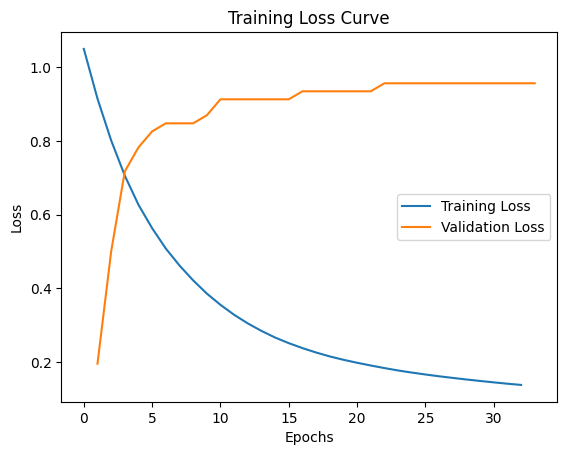

In [49]:
mlp_best = MLPClassifier(random_state=42, max_iter=500, activation= 'tanh', alpha= 0.005, hidden_layer_sizes= (40, 10), learning_rate= 'constant', solver= 'adam', early_stopping=True)
mlp_best.fit(X_train, y_train)

print("Train accuracy score", accuracy_score(y_train, mlp_best.predict(X_train)))
mlp_best_acc = accuracy_score(y_test, mlp_best.predict(X_test))
print("Test accuracy score",mlp_best_acc)
y_pred = mlp_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.plot(mlp_best.loss_curve_)
plt.plot(range(1, len(mlp_best.validation_scores_) + 1), mlp_best.validation_scores_)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

Train accuracy: 0.9604 (96.04%)
Nižšia presnosť na tréningových dátach v porovnaní s predošlými výsledkami bez early stoppingu (kde tréningové skóre bolo vyššie). To naznačuje, že model sa naučil len dostatočne, aby generalizoval, a early stopping zabránil pretrénovaniu.

Test accuracy: 0.9649 (96.49%)
Presnosť na testovacích dátach zostáva veľmi vysoká a porovnateľná s výsledkami bez early stoppingu, čo znamená, že model dokázal správne generalizovať aj bez toho, aby sa nadmerne prispôsobil tréningovým dátam.

Precision (Presnosť):
Trieda 0 (benígne): 0.97 – Model veľmi presne identifikuje benígne vzorky.
Trieda 1 (malígne): 0.95 – Vysoká presnosť aj pre malígne prípady, čo znamená, že väčšina predikovaných malígnych vzoriek bola skutočne malígna.

Recall (Citlivosť):
Trieda 0 (benígne): 0.97 – 97 % skutočne benígnych prípadov bolo správne identifikovaných.
Trieda 1 (malígne): 0.95 – 95 % skutočne malígnych prípadov bolo správne zachytených, čo je veľmi dobré.


In [50]:
# Výsledky modelov
y_train_pred = mlp_best.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = mlp_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

mlp_early_results = {
    'Model': ['MLP Classifier - Early Stopping'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

- Najlepšia konfigurácia bez Early Stopping

Train accuracy score 0.9846153846153847
Test accuracy score 0.9912280701754386
[[71  0]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



C:\Users\lenov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


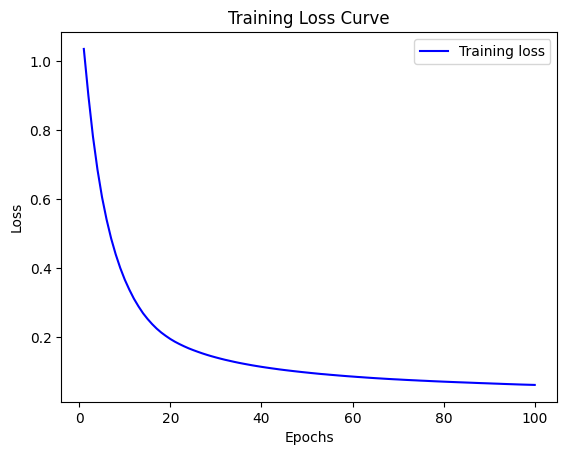

In [51]:
mlp_best3 = MLPClassifier(random_state=42, max_iter=100, activation= 'tanh', alpha= 0.005, hidden_layer_sizes= (40, 10), learning_rate= 'constant', solver= 'adam')
mlp_best3.fit(X_train, y_train)

print("Train accuracy score", accuracy_score(y_train, mlp_best3.predict(X_train)))
mlp_best3_acc = accuracy_score(y_test, mlp_best3.predict(X_test))
print("Test accuracy score",mlp_best3_acc)
y_pred = mlp_best3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss_values = mlp_best3.loss_curve_
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Konfigurácia bez Early Stopping mala:

Train accuracy: 98.46% – Veľmi vysoká presnosť na tréningových dátach, čo ukazuje, že model sa výborne naučil vzory na tréningovom sete.

Test accuracy: 99.12% – Ešte vyššia presnosť na testovacích dátach, čo znamená, že model dokázal veľmi dobre generalizovať a správne predikovať nové dáta.

Presnosť (Precision):
Trieda 0 (benígne): 0.99 – Veľmi vysoká presnosť, pričom len 1 prípad bol klasifikovaný nesprávne.
Trieda 1 (malígne): 1.00 – Všetky vzorky, ktoré boli označené ako malígne, boli skutočne malígne.

Citlivosť (Recall):
Trieda 0 (benígne): 1.00 – 100 % skutočne benígnych prípadov bolo správne klasifikovaných.
Trieda 1 (malígne): 0.98 – 98 % malígnych prípadov bolo správne zachytených.

In [52]:
#Výsledky modelov
y_train_pred = mlp_best3.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = mlp_best3.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

mlp_no_results = {
    'Model': ['MLP Classifier - No Stopping'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

Model MLP Classifier - použitý s kompletnými dátami bez redukcie.
- po skončení GridSearch najlepšía konfigurácia ďalej vyskúšaná s parametrom "Early Stopping" a bez...

- Pri použití Early Stopping výsledky sú: Train accuracy score 0.962, Test accuracy score 0.974. Výsledky sú podobné najlepším výsledkom z modelu Adaboost ale pravdepodobne bez overfittingu na train dátach.

- Bez Early Stopping výsledky sú: Train accuracy score 0.986, Test accuracy score 0.991. Je tam ale vysoké riziko overfittingu.

# Neurónová sieť cez Keras

Keras je ideálny pre klasifikáciu nádorov vďaka svojej jednoduchosti, podpore pokročilých techník hlbokého učenia a schopnosti efektívne pracovať s komplexnými datasetmi.

Vývoj modelu:

* 1. model vytvorený v Keras bol s jednou skrytou vrstvou a menším dropoutom. Dosiahol najnižšiu presnosť (90.51 %) a najvyššiu stratu (0.4170). Pre zlepšenie sme pridali ďalšiu vrstvu a zvýšili dropout.
* 2. model obsahoval dve skryté vrstvy s väčším počtom neurónov a dropoutom 0.2, čo viedlo k lepšej presnosti (93.85 %). Model mal stále potenciál na zlepšenie, pridali sme PCA a Early Stopping.
* 3. model dosiahol presnosť 96.31 % a stratu 0.1526. Tento model využíva PCA na redukciu dimenzionality a Early Stopping na optimalizáciu tréningu, čo viedlo k najlepším výsledkom.

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
y = data_reduced.iloc[:, 0]         

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
losses = []

for train_index, val_index in kfold.split(X_scaled, y):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pca = PCA(n_components=10)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)

    classifier = Sequential()
    classifier.add(Input(shape=(10,))) 
    classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.3))
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.3))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    classifier.fit(X_train, y_train, batch_size=100, epochs=150, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    score = classifier.evaluate(X_val, y_val, verbose=0)
    accuracies.append(score[1]) 
    losses.append(score[0])      

mean_accuracy3 = np.mean(accuracies)
mean_loss3 = np.mean(losses)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[71  0]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Celková presnosť modelu: 99% (0.99) – To znamená, že model správne klasifikoval 99 % všetkých vzoriek (benígnych aj malígnych).

Precision (Presnosť):
Trieda 0 (benígne): 0.99 – Model dokázal veľmi presne klasifikovať benígne vzorky. Znamená to, že len 1 % predikcií pre benígne vzorky bolo nesprávnych.
Trieda 1 (malígne): 1.00 – Všetky vzorky, ktoré model klasifikoval ako malígne, boli skutočne malígne. Model teda vykazuje perfektnú presnosť pre malígne prípady.

Recall (Citlivosť):
Trieda 0 (benígne): 1.00 – Všetky benígne vzorky boli správne klasifikované. Znamená to, že model správne zachytil 100 % benígnych prípadov.
Trieda 1 (malígne): 0.98 – Model zachytil 98 % malígnych prípadov, pričom 1 % bolo klasifikovaných nesprávne ako benígne (falošne negatívne).

In [54]:
# Výsledky modelov
_, train_accuracy = classifier.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {train_accuracy}')
_, test_accuracy = classifier.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {test_accuracy}')

neural_keras_results = {
    'Model': ['Neural Network with Keras'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]}

Train Accuracy: 0.9912280440330505
Test Accuracy: 0.9734513163566589


# Uloženie modelu

- používáme pickle
- uložíme model s najlepšími parametrami

In [ ]:
model = classifier

with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Záver

In [59]:
logistic_results_df = pd.DataFrame(logistic_results)
decision_tree_results_df = pd.DataFrame(decision_tree_results)
svm_results_df = pd.DataFrame(svm_results)
random_forest_results_df = pd.DataFrame(random_forest_results)
adaboost_results_df = pd.DataFrame(adaboost_results)
mlp_early_results_df = pd.DataFrame(mlp_early_results)
mlp_no_results_df = pd.DataFrame(mlp_no_results)
neural_keras_results_df = pd.DataFrame(neural_keras_results)


model_results = pd.concat([logistic_results_df, decision_tree_results_df, svm_results_df, 
                 random_forest_results_df, adaboost_results_df, mlp_early_results_df, 
                 mlp_no_results_df, neural_keras_results_df], ignore_index=True)


print(model_results)

                             Model  Train Accuracy  Test Accuracy
0              Logistic Regression        0.986813       0.973684
1                    Decision Tree        0.991209       0.947368
2                              SVM        0.986813       0.956140
3                    Random Forest        1.000000       0.964912
4                         Adaboost        1.000000       0.964912
5  MLP Classifier - Early Stopping        0.960440       0.964912
6     MLP Classifier - No Stopping        0.984615       0.991228
7        Neural Network with Keras        0.991228       0.973451


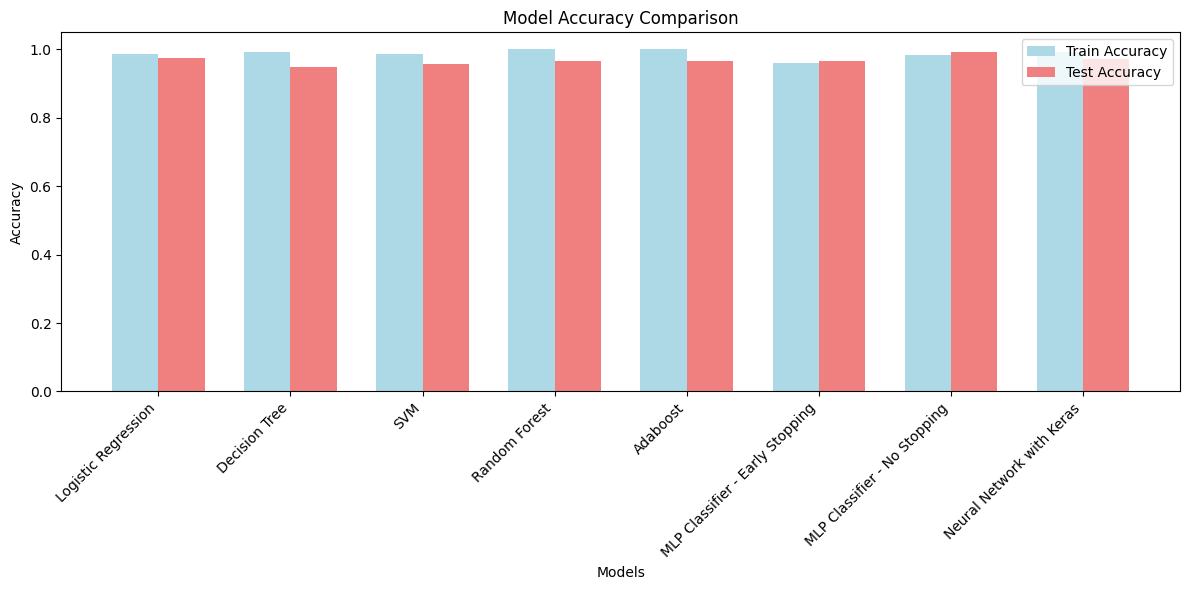

In [60]:
import matplotlib.pyplot as plt

# Transpose the DataFrame for easier plotting
model_results_transposed = model_results.transpose()

# Extract the model names
models = model_results_transposed.iloc[0].tolist()

# Extract the train and test accuracy values
train_accuracy = model_results_transposed.iloc[1].tolist()
test_accuracy = model_results_transposed.iloc[2].tolist()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = range(len(models))
train_bar_positions = [i for i in index]
test_bar_positions = [i + bar_width for i in index]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(train_bar_positions, train_accuracy, bar_width, label='Train Accuracy', color='lightblue')
plt.bar(test_bar_positions, test_accuracy, bar_width, label='Test Accuracy', color='lightcoral')

# Set the x-axis labels
plt.xticks([i + bar_width / 2 for i in index], models, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Na základe analýzy viacerých modelov strojového učenia sme porovnali ich presnosť a schopnosť správne identifikovať malígne a benígne bunky. Naším hlavným cieľom bolo nájsť model, ktorý bude opatrný pri klasifikácii a radšej klasifikuje benígne bunky ako malígne, aby sme znížili riziko zmeškania malígnych prípadov.

Na základe výsledkov odporúčame modely Fine-tuning bez early stoppingu alebo Keras model. Tieto modely vykazujú najvyššiu presnosť a recall pre malígne prípady, čo znamená, že sú schopné správne identifikovať takmer všetky malígne bunky, pričom sa minimalizuje riziko nesprávnej klasifikácie benígnych buniek. Týmto prístupom zaisťujeme vysokú bezpečnosť a opatrnosť pri diagnostike malígnych buniek, čo je v kontexte zdravotnej starostlivosti kľúčové.

Naša práca ukazuje, že kombinácia vysokej presnosti a citlivosti pre obe triedy dokáže výrazne znížiť riziko nesprávnej diagnózy, pričom poskytuje lekárom nástroj na efektívnu a spoľahlivú diagnostiku rakoviny prsníka.